In [414]:
import pandas as pd
import re
import math
import numpy as np


In [ ]:
gp_df = pd.read_csv('priority_claims.csv', sep='\t')

In [ ]:
gp_df.loc[(gp_df.abstract_text.isnull()) & (gp_df.title_text.isnull())]

In [10]:
def clean_text(text):
    if isinstance(text, float):
        return text
    processed = text.lower()
    processed = re.sub(r'[#|\!|\-|\+|:|//|,|\"|\[|\]]', " ", processed)
    processed = re.sub(r"'", "", processed)
    processed = re.sub(r'"', "", processed)
    processed = re.sub(r'(?:(?:\d+,?)+(?:\.?\d+)?)', ' ', processed)
    processed = re.sub('[\s]+', ' ', processed)
    return processed

In [ ]:
gp_df["abstract_clean"] = gp_df["abstract_text"].apply(clean_text)

In [ ]:
gp_df["title_clean"] = gp_df["title_text"].apply(clean_text)

In [ ]:
gp_df.to_csv("priority_claims_clean.csv",index=False, sep='\t')

In [156]:
disease_syn = pd.read_excel("mortality_data/disease_synonyms.xlsx")

In [3]:
gp_df = pd.read_csv("priority_claims_clean.csv",sep='\t')

/Users/jaeyoonjung/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
gp_df.head()

In [32]:
disease_syn = disease_syn[["ICD_code", "entry_term"]]

In [33]:
codes = list(disease_syn.ICD_code.unique())

In [34]:
len(codes)

84

In [37]:
def search_patent(df, terms):
    
    result=[]
    for term in terms:
        clean_term = clean_text(term)
        result = result + df.loc[(~df.abstract_clean.isnull()) & (df.abstract_clean.str.contains(clean_term))].publication_number.tolist()
        result = result + df.loc[(~df.title_clean.isnull()) & (df.title_clean.str.contains(clean_term))].publication_number.tolist()
        result = result + df.loc[(~df.mesh_clean.isnull()) & (df.mesh_clean.str.contains(clean_term))].publication_number.tolist()

    result = list(set(result))
    return result

In [38]:
ob_df = pd.read_csv("ob_patents.csv",sep='\t')

In [39]:
ob_df["title_clean"] = ob_df["title_text"].apply(clean_text)
ob_df["abstract_clean"] = ob_df["abstract_text"].apply(clean_text)
ob_df["mesh_clean"] = ob_df["mesh_heading"].apply(clean_text)


In [40]:
for c in codes:
    print("Searching patents for %s" % c)
    search_terms = disease_syn.loc[disease_syn.ICD_code == c].entry_term.values
    patents = search_patent(ob_df, search_terms)
    fname = 'mortality_data/ob_result/%s.txt' % c
    with open(fname, 'w') as f:
        for p in patents:
            f.write("%s\n" % p)
    
    print("Wrote %s" % fname)
    print("...")

Searching patents for A00
Wrote mortality_data/ob_result/A00.txt
...
Searching patents for A01
Wrote mortality_data/ob_result/A01.txt
...
Searching patents for A02
Wrote mortality_data/ob_result/A02.txt
...
Searching patents for A03
Wrote mortality_data/ob_result/A03.txt
...
Searching patents for A04
Wrote mortality_data/ob_result/A04.txt
...
Searching patents for A05
Wrote mortality_data/ob_result/A05.txt
...
Searching patents for A06,A07
Wrote mortality_data/ob_result/A06,A07.txt
...
Searching patents for A08
Wrote mortality_data/ob_result/A08.txt
...
Searching patents for A09
Wrote mortality_data/ob_result/A09.txt
...
Searching patents for A15,A16
Wrote mortality_data/ob_result/A15,A16.txt
...
Searching patents for A17,A18,A19
Wrote mortality_data/ob_result/A17,A18,A19.txt
...
Searching patents for A20
Wrote mortality_data/ob_result/A20.txt
...
Searching patents for A21
Wrote mortality_data/ob_result/A21.txt
...
Searching patents for A22
Wrote mortality_data/ob_result/A22.txt
...
Se

/Users/jaeyoonjung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/Users/jaeyoonjung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
/Users/jaeyoonjung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Wrote mortality_data/ob_result/B01.txt
...
Searching patents for B02
Wrote mortality_data/ob_result/B02.txt
...
Searching patents for B03
Wrote mortality_data/ob_result/B03.txt
...
Searching patents for B04
Wrote mortality_data/ob_result/B04.txt
...
Searching patents for B05,B06
Wrote mortality_data/ob_result/B05,B06.txt
...
Searching patents for B07
Wrote mortality_data/ob_result/B07.txt
...
Searching patents for B08,B09
Wrote mortality_data/ob_result/B08,B09.txt
...
Searching patents for B15,B16,B17,B18,B19
Wrote mortality_data/ob_result/B15,B16,B17,B18,B19.txt
...
Searching patents for B20,B21,B22,B23,B24
Wrote mortality_data/ob_result/B20,B21,B22,B23,B24.txt
...
Searching patents for B25,B27,B30
Wrote mortality_data/ob_result/B25,B27,B30.txt
...
Searching patents for B26
Wrote mortality_data/ob_result/B26.txt
...
Searching patents for B33
Wrote mortality_data/ob_result/B33.txt
...
Searching patents for B34
Wrote mortality_data/ob_result/B34.txt
...
Searching patents for B35,B36,B37

In [17]:
gp_df.shape

(1341859, 16)

In [18]:
gp_df.publication_number.nunique()

1341859

In [36]:
for c in codes[18:]:
    print("Searching patents for %s" % c)
    search_terms = disease_syn.loc[disease_syn.ICD_code == c].entry_term.values
    patents = search_patent(gp_df, search_terms)
    fname = 'mortality_data/result/%s.txt' % c
    with open(fname, 'w') as f:
        for p in patents:
            f.write("%s\n" % p)
    
    print("Wrote %s" % fname)
    print("...")

Searching patents for A27
Wrote mortality_data/result/A27.txt
...
Searching patents for A28
Wrote mortality_data/result/A28.txt
...
Searching patents for A31
Wrote mortality_data/result/A31.txt
...
Searching patents for A30
Wrote mortality_data/result/A30.txt
...
Searching patents for A32
Wrote mortality_data/result/A32.txt
...
Searching patents for A33,A34,A35
Wrote mortality_data/result/A33,A34,A35.txt
...
Searching patents for A36
Wrote mortality_data/result/A36.txt
...
Searching patents for A37
Wrote mortality_data/result/A37.txt
...
Searching patents for A38
Wrote mortality_data/result/A38.txt
...
Searching patents for A39
Wrote mortality_data/result/A39.txt
...
Searching patents for A40,A41
Wrote mortality_data/result/A40,A41.txt
...
Searching patents for A42,A43,A48,A49
Wrote mortality_data/result/A42,A43,A48,A49.txt
...
Searching patents for A44
Wrote mortality_data/result/A44.txt
...
Searching patents for A46
Wrote mortality_data/result/A46.txt
...
Searching patents for A50,A5

/Users/jaeyoonjung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/Users/jaeyoonjung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


Wrote mortality_data/result/B01.txt
...
Searching patents for B02
Wrote mortality_data/result/B02.txt
...
Searching patents for B03
Wrote mortality_data/result/B03.txt
...
Searching patents for B04
Wrote mortality_data/result/B04.txt
...
Searching patents for B05,B06
Wrote mortality_data/result/B05,B06.txt
...
Searching patents for B07
Wrote mortality_data/result/B07.txt
...
Searching patents for B08,B09
Wrote mortality_data/result/B08,B09.txt
...
Searching patents for B15,B16,B17,B18,B19
Wrote mortality_data/result/B15,B16,B17,B18,B19.txt
...
Searching patents for B20,B21,B22,B23,B24
Wrote mortality_data/result/B20,B21,B22,B23,B24.txt
...
Searching patents for B25,B27,B30
Wrote mortality_data/result/B25,B27,B30.txt
...
Searching patents for B26
Wrote mortality_data/result/B26.txt
...
Searching patents for B33
Wrote mortality_data/result/B33.txt
...
Searching patents for B34
Wrote mortality_data/result/B34.txt
...
Searching patents for B35,B36,B37,B38,B39,B40,B41,B42,B43,B44,B45,B46,B4

In [41]:
matched_patents = pd.DataFrame(columns=["ICD_code", "publication_number"])
for c in codes:
    fname = 'mortality_data/result/%s.txt' % c
    with open(fname) as f:
        patents = f.read().splitlines()
    
    searched = pd.DataFrame({"ICD_code": [c]*len(patents), "publication_number":patents})
    matched_patents = matched_patents.append(searched, ignore_index=True)
    

In [42]:
matched_patents.shape

(145646, 2)

In [43]:
matched_patents.publication_number.nunique()

119921

In [44]:
for c in codes:
    fname = 'mortality_data/ob_result/%s.txt' % c
    with open(fname) as f:
        patents = f.read().splitlines()
    
    searched = pd.DataFrame({"ICD_code": [c]*len(patents), "publication_number":patents})
    matched_patents = matched_patents.append(searched, ignore_index=True)
    

In [45]:
matched_patents = matched_patents.drop_duplicates().reset_index(drop=True)

In [46]:
matched_patents = matched_patents.sort_values(by="ICD_code").reset_index(drop=True)

In [50]:
matched_patents.to_csv("data/disease_patent_match.csv", sep='\t', index=False)

In [51]:
families = pd.concat([gp_df[["publication_number","family_id"]], ob_df[["publication_number","family_id"]]])
families = families.drop_duplicates()
families= families.reset_index(drop=True)

In [166]:
matched_patents_fam = pd.merge(left=matched_patents, right=families, on="publication_number", how="left")
matched_patents_fam = pd.merge(left = matched_patents_fam, right=families, on="family_id", how="left")
matched_patents_fam = matched_patents_fam.drop("publication_number_x", axis=1)
matched_patents_fam = matched_patents_fam.drop("family_id", axis=1)
matched_patents_fam = matched_patents_fam.rename(columns={"publication_number_y":"publication_number"})
matched_patents_fam = matched_patents_fam.drop_duplicates().reset_index(drop=True)

In [105]:
patent_cols = ["publication_number","country_code", "publication_date", "assignees_harmonized", "citations", "ipc_codes"]
all_patents = pd.concat([gp_df[patent_cols], ob_df[patent_cols]])

In [106]:
all_patents = all_patents.drop_duplicates("publication_number")
all_patents = all_patents.reset_index(drop=True)
all_patents["publication_year"] = all_patents["publication_date"].apply(lambda x: int(str(x)[0:4]))

In [165]:
def count_citation(x):
    if isinstance(x, str):
        return len(x.split(','))
    else:
        return 0
all_patents["citation_count"]= all_patents["citations"].apply(count_citation)
all_patents = all_patents.drop(["publication_date"], axis=1)
matched_patents_fam=pd.merge(left = matched_patents_fam,right=all_patents, on="publication_number", how="left")

In [38]:
matched_patents_fam.to_csv("data/disease_patent_match_extended.csv", sep='\t', index=False)

In [2]:
matched_patents_fam = pd.read_csv("data/disease_patent_match_extended.csv", sep='\t')

In [41]:
matched_patents_fam.shape

(173845, 7)

In [328]:
disease_group = pd.read_excel("mortality_data/disease_code.xlsx")
disease_custom_group = disease_group[["neglected", "custom_group", "custom_group_code"]].drop_duplicates().reset_index(drop=True)

In [329]:
matched_patents_full = pd.merge(left = matched_patents_fam, right = disease_custom_group,
        left_on="ICD_code", right_on="custom_group_code", how="left")

In [330]:
by_disease_group = matched_patents_full.groupby(["ICD_code","custom_group","neglected", "publication_year"])\
    .agg({"publication_number":"count"}).reset_index()
by_disease_group["log_patent_count"] = by_disease_group["publication_number"].apply(math.log)
by_disease_group = by_disease_group.loc[by_disease_group.publication_year >= 1988]
by_disease_group = by_disease_group.reset_index(drop=True)
by_disease_group =  by_disease_group.rename(columns={"publication_number":"patent_count"})

In [72]:
by_disease_group.to_csv("data/by_disease_group.csv",index=False, sep="\t")

In [371]:
# fill in missing year. looks like data stabilizes from 1993
by_disease_group_complete = by_disease_group.copy()
year_list = list(range(1988,2019))
dgs = by_disease_group.ICD_code.unique()
for dg in dgs:
    dg_df = by_disease_group.loc[by_disease_group.ICD_code == dg]
    dg_name = dg_df.custom_group.values[0]
    dg_neglected = dg_df.neglected.values[0]
    zero_row = dict({"ICD_code":dg, "custom_group":dg_name, "neglected":dg_neglected, 
                     "patent_count":0, "log_patent_count":0})
    for y in year_list:
        if y not in dg_df.publication_year.values:
            zero_row["publication_year"] = y
            by_disease_group_complete = by_disease_group_complete.append(zero_row, ignore_index=True)
        

In [372]:
by_disease_group_complete.loc[by_disease_group_complete.patent_count == 0].groupby("publication_year")["patent_count"].count()

publication_year
1988    28
1989    33
1990    26
1991    30
1992    24
1993    10
1994    16
1995    14
1996    12
1997     5
1998     9
1999    10
2000    14
2001     9
2002     8
2003     5
2004     6
2005     3
2006     7
2007     5
2008     3
2010     2
2011     1
2012     3
2013     2
2014     2
2015     1
2016     3
2017     2
2018     2
Name: patent_count, dtype: int64

In [373]:
by_disease_group_complete = by_disease_group_complete.loc[by_disease_group_complete.publication_year>=1993]

In [376]:
by_disease_group_complete.head()

,ICD_code,custom_group,neglected,publication_year,patent_count,log_patent_count
5,A00,Cholera,True,1993,7,1.945910
6,A00,Cholera,True,1994,13,2.564949
7,A00,Cholera,True,1995,14,2.639057
8,A00,Cholera,True,1996,19,2.944439
9,A00,Cholera,True,1997,13,2.564949


In [378]:
by_disease_group_complete = by_disease_group_complete.sort_values(["ICD_code",  "publication_year"]).reset_index(drop=True)

In [379]:
by_disease_group_complete.to_csv("data/by_disease_group_complete.csv", sep='\t', index=False)

## get mortality data

In [97]:
mort = pd.read_csv("data/mortality_data.csv", sep="\t")
mort = pd.merge(left=mort, right=disease_group[["ICD_code", "custom_group_code"]], 
                left_on="cause", right_on="ICD_code")
mort = mort.groupby(["Year", "custom_group_code", "country"]).Deaths1.sum().reset_index()

In [101]:
mort = mort.rename(columns={"custom_group_code":"ICD_code", "Deaths1":"deaths"})

In [103]:
mort.to_csv("data/mortality_by_disease.csv", sep="\t", index=False)

## get CL episodes

In [191]:
cl_ep = pd.read_excel("CL_episodes.xlsx")

In [192]:
cl_ep = cl_ep.loc[~cl_ep.disease_group.isnull()]

In [194]:
cl_ep = cl_ep[["year", "country", "disease_group", "outcome"]]

In [195]:
cl_ep.head()

,year,country,disease_group,outcome
0,2001,Brazil,"B20,B21,B22,B23,B24",discount
1,2001,Brazil,"B20,B21,B22,B23,B24",discount
2,2001,Brazil,"B20,B21,B22,B23,B24",discount
3,2001,USA,A01||A02||A04||A09||A20||A22||A54,discount
4,2001,Germany,"B20,B21,B22,B23,B24",CL


In [196]:
cl_ep_unstacked = pd.DataFrame(columns=["year", "country", "ICD_code", "outcome"])
for i, row in cl_ep.iterrows():
    new_row=dict()
    new_row["year"] = row["year"]
    new_row["country"] = row["country"]
    new_row["outcome"] = row["outcome"]
    dgs = row["disease_group"].split("||")
    for dg in dgs:
        new_row["ICD_code"] = dg
        cl_ep_unstacked = cl_ep_unstacked.append(new_row, ignore_index=True)
    

In [236]:
cl_ep_unstacked.sort_values(["ICD_code", "year", "country"])

,year,country,ICD_code,outcome,CL,discount,CL_request_cumulative,CL_cumulative,discount_cumulative
11,2001,Canada,A01,discount,0,1,2,0,2
3,2001,USA,A01,discount,0,1,1,0,1
12,2001,Canada,A02,discount,0,1,2,0,2
4,2001,USA,A02,discount,0,1,1,0,1
13,2001,Canada,A04,discount,0,1,2,0,2
5,2001,USA,A04,discount,0,1,1,0,1
57,2005,Italy,A04,CL,1,0,3,1,2
14,2001,Canada,A09,discount,0,1,2,0,2
6,2001,USA,A09,discount,0,1,1,0,1
15,2001,Canada,A20,discount,0,1,2,0,2


In [201]:
cl_ep_unstacked["CL"] = 0
cl_ep_unstacked.loc[cl_ep_unstacked.outcome=="CL","CL"] = 1

cl_ep_unstacked["discount"] = 0
cl_ep_unstacked.loc[cl_ep_unstacked.outcome=="discount","discount"] = 1

In [203]:
cl_ep_unstacked["CL_request_cumulative"] = cl_ep_unstacked.groupby(["ICD_code"]).cumcount() + 1
cl_ep_unstacked["CL_cumulative"] = cl_ep_unstacked.groupby(["ICD_code"])["CL"].cumsum()
cl_ep_unstacked["discount_cumulative"] = cl_ep_unstacked.groupby(["ICD_code"])["discount"].cumsum()


In [277]:
cl_ep_unstacked.loc[cl_ep_unstacked.country=="USA", "country"] = "United States of America"
cl_ep_unstacked.to_csv("data/cl_ep_unstacked.csv", sep="\t", index=False)

In [211]:
cl_ep_cumulative = cl_ep_unstacked.groupby(["ICD_code","year"]).agg({"CL_request_cumulative":"max",
                                                "CL_cumulative":"max",
                                                "discount_cumulative":"max"
                                               }).reset_index()

In [221]:
cl_ep_cumulative["issuing_country"] = None

In [233]:
cl_ep_cumulative.loc[0:7,"issuing_country"] = "United States of America, Canada"

In [239]:
cl_ep_cumulative.loc[3,"issuing_country"] = "United States of America, Canada, Italy"

In [244]:
cl_ep_cumulative.loc[8,"issuing_country"] = "Colombia, Malaysia"

In [245]:
cl_ep_cumulative.loc[9,"issuing_country"] = "Colombia, Malaysia, Chile"

In [251]:
cl_ep_cumulative.loc[10:,"issuing_country"] = "Brazil, Germany, South Africa"

In [254]:
cl_ep_cumulative.loc[11:,"issuing_country"] = "Brazil, Germany, South Africa, Zimbabwe"

In [256]:
cl_ep_cumulative.loc[12:,"issuing_country"] = "Brazil, Germany, South Africa, Zimbabwe, Ecuador, Rwanda"

In [262]:
cl_ep_cumulative.loc[13:,"issuing_country"] = "Brazil, Germany, South Africa, Zimbabwe, Ecuador, Rwanda, United States of America, Malaysia, Indonesia, Mozambique, Zambia, Swaziland"

In [263]:
cl_ep_cumulative.loc[14:,"issuing_country"] = "Brazil, Germany, South Africa, Zimbabwe, Ecuador, Rwanda, United States of America, Malaysia, Indonesia, Mozambique, Zambia, Swaziland, Cameroon, Eretria, Guinea, Canada, Ghana"

In [265]:
cl_ep_cumulative.loc[15:,"issuing_country"] = "Brazil, Germany, South Africa, Zimbabwe, Ecuador, Rwanda, United States of America, Malaysia, Indonesia, Mozambique, Zambia, Swaziland, Cameroon, Eretria, Guinea, Canada, Ghana, Thailand"

In [278]:
cl_ep_cumulative.to_csv("data/cl_ep_cumulative.csv", sep='\t', index=False)

In [306]:
# if there is a missing year after the first issuance of CL, replicate the previous row
cl_ep_cumulative_complete = pd.DataFrame(columns=cl_ep_cumulative.columns)
codes = cl_ep_cumulative.ICD_code.unique()

for c in codes:
    c_cum = cl_ep_cumulative.loc[cl_ep_cumulative.ICD_code == c].copy()
    year = c_cum.year.min()
    for y in range(year, 2019):
        if y in c_cum.year.values:
            row=c_cum.loc[c_cum.year==y]
        else:
            row["year"] = y
            
        cl_ep_cumulative_complete = cl_ep_cumulative_complete.append(row, ignore_index=True)
    

/Users/jaeyoonjung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
cl_ep_weight = pd.merge(left = cl_ep_weight, right=mort, left_on = ["year", "ICD_code", "issuing_country"], 
         right_on=["Year", "ICD_code", "country"], how="left")

In [308]:
cl_ep_cumulative_complete.to_csv("data/cl_ep_cumulative_complete.csv", sep='\t', index=False)

# combine patent data with CL data

In [384]:
patent_CL_df = pd.merge(left = by_disease_group_complete, right=cl_ep_cumulative_complete, 
                        left_on=["ICD_code", "publication_year"], right_on=["ICD_code", "year"], how="left"
                        ).drop("year", axis=1)

In [391]:
patent_CL_df[["CL_request_cumulative", "CL_cumulative", "discount_cumulative"]] = patent_CL_df[["CL_request_cumulative", "CL_cumulative", "discount_cumulative"]].fillna(0)

In [403]:
request_treated = cl_ep_cumulative_complete.loc[cl_ep_cumulative_complete.CL_request_cumulative > 0].ICD_code.unique()

In [404]:
CL_treated = cl_ep_cumulative_complete.loc[cl_ep_cumulative_complete.CL_cumulative > 0].ICD_code.unique()

In [405]:
discount_treated = cl_ep_cumulative_complete.loc[cl_ep_cumulative_complete.discount_cumulative > 0].ICD_code.unique()

In [407]:
patent_CL_df["CL_requested"] = 0
patent_CL_df["CL_issued"] = 0
patent_CL_df["discounted"] = 0

In [408]:
patent_CL_df.loc[patent_CL_df.ICD_code.isin(request_treated), "CL_requested"] = 1
patent_CL_df.loc[patent_CL_df.ICD_code.isin(CL_treated), "CL_issued"] = 1
patent_CL_df.loc[patent_CL_df.ICD_code.isin(discount_treated), "discounted"] = 1


In [546]:
cl_ep_weight = pd.DataFrame(columns=["orig_index", "ICD_code", "publication_year","issuing_country"])
for i, row in patent_CL_df.iterrows():
    new_row=dict()
    new_row["ICD_code"] = row["ICD_code"]
    new_row["publication_year"] = row["publication_year"]
    new_row["orig_index"] = i
    countries = row["issuing_country"]
    if isinstance(countries, float):
        continue
        
    countries = countries.split(", ")
    
    for c in countries:
        new_row["issuing_country"] = c
        cl_ep_weight = cl_ep_weight.append(new_row, ignore_index=True)

In [547]:
cl_ep_weight = pd.merge(left = cl_ep_weight, right=mort, left_on = ["publication_year", "ICD_code", "issuing_country"], 
         right_on=["Year", "ICD_code", "country"], how="left")

In [548]:
# mortality data is missing some countries; narrow down to avalilable ones
cl_countries =  cl_ep_weight.issuing_country.unique()
mort_avail_countries = mort.loc[mort.country.isin(cl_countries)].country.unique()

In [549]:
cl_ep_weight = cl_ep_weight.loc[cl_ep_weight.issuing_country.isin(mort_avail_countries)]

In [543]:
def bfind_latest_death(row):
    search_code = row["ICD_code"]
    search_year = row["publication_year"]
    search_country = row["issuing_country"]
    
    match_mort = mort.loc[(mort.ICD_code == search_code) & (mort.country == search_country)]
    if len(match_mort) == 0:
        return np.nan
    else:
        right_before = match_mort.loc[match_mort.Year < search_year]
        if len(right_before) > 0:
            return right_before.iloc[-1]["deaths"]
        right_after = match_mort.loc[match_mort.Year > search_year]
        if len(right_after) > 0: 
            return right_after.iloc[0]["deaths"]
        else:
            return np.nan

In [550]:
cl_ep_weight = cl_ep_weight.sort_values(["issuing_country", "ICD_code", "publication_year"], ascending=True).reset_index(drop=True)

In [554]:
cl_ep_weight.loc[cl_ep_weight.deaths.isnull(), "deaths"] = cl_ep_weight.loc[cl_ep_weight.deaths.isnull()].apply(bfind_latest_death ,axis=1)

In [557]:
cl_ep_weight.loc[cl_ep_weight.deaths.isnull(), "deaths"] = 0

In [563]:
cl_ep_weight = cl_ep_weight.groupby(["orig_index", "ICD_code","publication_year"])["deaths"].sum().reset_index()

In [565]:
cl_ep_weight = cl_ep_weight[["orig_index", "deaths"]]

In [575]:
patent_CL_df = pd.merge(left = patent_CL_df, right = cl_ep_weight, left_index=True, right_on="orig_index", how="left")


In [579]:
patent_CL_df.loc[patent_CL_df.deaths.isnull(),"deaths"] = 0

In [583]:
cl_ep_cumulative_complete.loc[cl_ep_cumulative_complete.CL_cumulative > 5]

,ICD_code,year,CL_request_cumulative,CL_cumulative,discount_cumulative,issuing_country
131,"B20,B21,B22,B23,B24",2004,32,16,16,"Brazil, Germany, South Africa, Zimbabwe, Ecuad..."
132,"B20,B21,B22,B23,B24",2005,43,25,18,"Brazil, Germany, South Africa, Zimbabwe, Ecuad..."
133,"B20,B21,B22,B23,B24",2006,44,26,18,"Brazil, Germany, South Africa, Zimbabwe, Ecuad..."
134,"B20,B21,B22,B23,B24",2007,51,33,18,"Brazil, Germany, South Africa, Zimbabwe, Ecuad..."
135,"B20,B21,B22,B23,B24",2008,51,33,18,"Brazil, Germany, South Africa, Zimbabwe, Ecuad..."
136,"B20,B21,B22,B23,B24",2009,52,34,18,"Brazil, Germany, South Africa, Zimbabwe, Ecuad..."
137,"B20,B21,B22,B23,B24",2010,53,35,18,"Brazil, Germany, South Africa, Zimbabwe, Ecuad..."
138,"B20,B21,B22,B23,B24",2011,53,35,18,"Brazil, Germany, South Africa, Zimbabwe, Ecuad..."
139,"B20,B21,B22,B23,B24",2012,53,35,18,"Brazil, Germany, South Africa, Zimbabwe, Ecuad..."
140,"B20,B21,B22,B23,B24",2013,54,36,18,"Brazil, Germany, South Africa, Zimbabwe, Ecuad..."


In [581]:
patent_CL_df.to_csv("data/patent_CL_df.csv", sep='\t', index=False)

In [588]:
patent_CL_df.loc[patent_CL_df.CL_request_cumulative > 0].ICD_code.nunique()

9

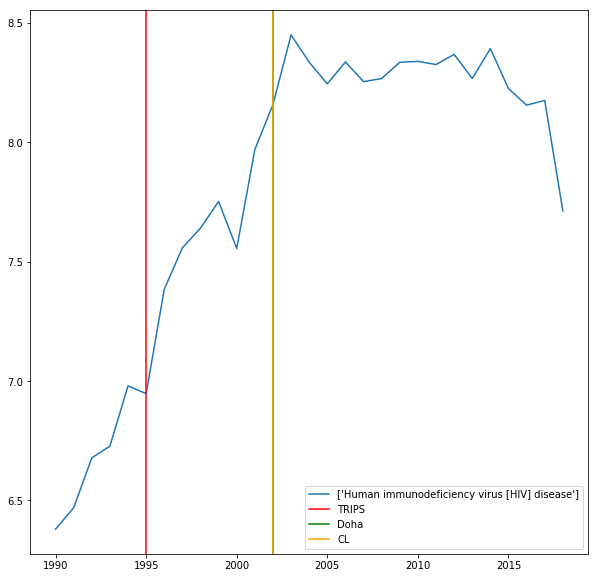

In [236]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
dg="B20,B21,B22,B23,B24"
dg_label = by_disease_group.loc[by_disease_group.ICD_code==dg].custom_group.unique()
dg_patent = by_disease_group.loc[by_disease_group.ICD_code==dg]
dg_patent = dg_patent.loc[(dg_patent.publication_year >= 1990)]
x=dg_patent.publication_year
y=dg_patent.log_patent_count
plt.plot(x,y, label=dg_label)
plt.axvline(x=1995, color="red", label="TRIPS")
plt.axvline(x=2002, color="green", label="Doha")
CL = disease_group.loc[disease_group.custom_group_code == dg]["CL_year"].unique()
if CL is not None:
    plt.axvline(x=CL, color="orange", label="CL")

plt.legend()

In [217]:
CL

array([2002.])

In [272]:
hiv_patents = matched_patents_fam.loc[matched_patents_fam.ICD_code== "B20,B21,B22,B23,B24"]

In [124]:
hiv_ipcs = []
for ipc in hiv_patents.ipc_codes:
    if isinstance(ipc, str):
        hiv_ipcs = hiv_ipcs + ipc.split(",")

In [146]:
hiv_assignees = []
for ah in hiv_patents.assignees_harmonized:
    if isinstance(ah, str):
        hiv_assignees = hiv_assignees + ah.split("||")

In [149]:
len(set(hiv_assignees))

9736

In [132]:
import collections

In [138]:
ipc_freq = pd.DataFrame.from_dict(dict(collections.Counter(hiv_ipcs)), orient="index").reset_index()
ipc_freq.columns = ["subclass", "cnt"]
ipc_freq = ipc_freq.sort_values("cnt", ascending=False)
ipc_freq.loc[ipc_freq.cnt > 100]

In [152]:
assignee_freq = pd.DataFrame.from_dict(dict(collections.Counter(hiv_assignees)), orient="index").reset_index()
assignee_freq.columns = ["assignee", "cnt"]
assignee_freq = assignee_freq.sort_values("assignee", ascending=False)
#ipc_freq.loc[ipc_freq.cnt > 100]

In [155]:
assignee_freq.loc[assignee_freq.cnt > 50]

,assignee,cnt
169,WYETH CORP,64
232,WARNER LAMBERT CO,53
11,US HEALTH,230
632,UNIV TEXAS,56
472,UNIV SHANDONG,69
99,UNIV PENNSYLVANIA,57
430,UNIV FUDAN,109
176,UNIV EMORY,106
111,UNIV DUKE,101
260,UNIV CALIFORNIA,112


In [273]:
hiv_patents.shape

(17058, 8)

In [261]:
drugbank_hiv = pd.read_csv("drugbank_hiv_list.csv", sep='\t')

In [266]:
hiv_CL = pd.DataFrame(columns=hiv_patents.columns)
for drugbank_patent in drugbank_hiv.publication_number:
    hiv_CL = hiv_CL.append(hiv_patents[hiv_patents.publication_number.str.contains(drugbank_patent)])

In [268]:
hiv_ipcs_CL = []
for ipc in hiv_CL.ipc_codes:
    if isinstance(ipc, str):
        hiv_ipcs_CL = hiv_ipcs_CL + ipc.split(",")


In [282]:
hiv_ipcs_CL = list(set(hiv_ipcs_CL))

In [280]:
#hiv_patents_stacked = pd.DataFrame(columns=["publication_number","publication_year","subclass"])
#hiv_patents = hiv_patents.reset_index(drop=True)
for i, row in hiv_patents.iloc[16453:].iterrows(): 
    ipcs = row["ipc_codes"].split(",")
    new_row = dict()
    new_row["publication_number"] = row["publication_number"]
    #new_row["assignees"] = row["assignees_harmonized"]
    new_row["publication_year"] = row["publication_year"]
    for i in ipcs:
        new_row["subclass"] = i
        hiv_patents_stacked = hiv_patents_stacked.append(new_row, ignore_index=True)

In [277]:
i

16452

In [278]:
hiv_patents.shape

(17058, 8)

In [281]:
hiv_patents_stacked

,publication_number,publication_year,subclass
0,US-2003225155-A1,2003,A61K31/381
1,US-2003225155-A1,2003,A61K31/341
2,US-2003225155-A1,2003,A61K45/06
3,US-2003225155-A1,2003,A61K31/345
4,US-6803379-B2,2004,A61K31/345
5,US-6803379-B2,2004,A61K31/341
6,US-6803379-B2,2004,A61K31/381
7,US-6803379-B2,2004,A61K45/06
8,US-2004167204-A1,2004,A61K31/341
9,US-2004167204-A1,2004,A61K31/345


In [302]:
hiv_patents_stacked["publication_year"] = hiv_patents_stacked["publication_year"].apply(int)
by_hiv_subclass = hiv_patents_stacked.loc[hiv_patents_stacked.publication_year >= 1985]
by_hiv_subclass = by_hiv_subclass.loc[by_hiv_subclass.publication_year <= 2016]

by_hiv_subclass = by_hiv_subclass.groupby(["subclass", "publication_year"])["publication_number"].count().reset_index()

In [303]:
major_subclass = by_hiv_subclass.groupby("subclass").publication_number.mean().reset_index()
major_subclass = major_subclass.loc[major_subclass.publication_number >= 10].subclass.unique()

In [304]:
by_hiv_subclass = by_hiv_subclass.loc[by_hiv_subclass.subclass.isin(major_subclass)]

In [318]:
by_hiv_subclass["CL"] = "No CL"
by_hiv_subclass.loc[by_hiv_subclass.subclass.isin(hiv_ipcs_CL),"CL"] = "CL"

In [320]:
by_hiv_subclass["pre2002"] = "pre"
by_hiv_subclass.loc[by_hiv_subclass.publication_year >=2002, "pre2002"] = "post"

In [324]:
by_hiv_subclass.groupby(["CL","pre2002"]).agg({"publication_number":"mean"}).reset_index()

,CL,pre2002,publication_number
0,CL,post,28.350927
1,CL,pre,10.591667
2,No CL,post,19.068694
3,No CL,pre,6.355499


In [325]:
by_hiv_subclass.subclass.nunique()

113

In [327]:
by_hiv_subclass.loc[by_hiv_subclass.CL=="No CL"].subclass.nunique()

65

In [312]:
by_hiv_subclass_summary = by_hiv_subclass.groupby("subclass").\
    agg({"publication_year":"min", "publication_number":"mean"}).reset_index()
by_hiv_subclass_summary.columns = ["subclass", "first_publication_year", "patent_cnt"]
by_hiv_subclass_summary["CL"] = False
by_hiv_subclass_summary.loc[by_hiv_subclass_summary.subclass.isin(hiv_ipcs_CL),"CL"] = True

In [313]:
by_hiv_subclass_summary.CL.unique()

array([ True, False])

In [322]:
by_hiv_subclass

,subclass,publication_year,publication_number,CL,pre2002
821,A61K31/00,1988,1,CL,pre
822,A61K31/00,1990,5,CL,pre
823,A61K31/00,1991,6,CL,pre
824,A61K31/00,1992,2,CL,pre
825,A61K31/00,1993,7,CL,pre
826,A61K31/00,1994,3,CL,pre
827,A61K31/00,1995,3,CL,pre
828,A61K31/00,1996,7,CL,pre
829,A61K31/00,1997,19,CL,pre
830,A61K31/00,1998,25,CL,pre


In [328]:
by_hiv_subclass_summary

,subclass,first_publication_year,patent_cnt,CL
0,A61K31/00,1988,22.750000,True
1,A61K31/137,1999,12.555556,False
2,A61K31/138,1998,10.111111,False
3,A61K31/165,1987,13.629630,True
4,A61K31/167,1998,12.368421,False
5,A61K31/19,1987,13.178571,False
6,A61K31/192,1995,19.454545,False
7,A61K31/216,1995,13.636364,False
8,A61K31/27,1991,10.541667,False
9,A61K31/40,1989,22.214286,True


In [332]:
matched_patents_full.groupby("country_code").publication_number.count()


country_code
BE        75
CA      2326
CN    200469
DE      8384
DK       146
EP     14148
ES      2949
FI       156
FR      7361
GB      3916
JP     49836
KR     14999
LU        18
NL       350
RU     13311
US    218329
WO      4056
Name: publication_number, dtype: int64